In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv(r"C:\Users\DYNABOOK\Downloads\kidney_disease.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<Axes: >

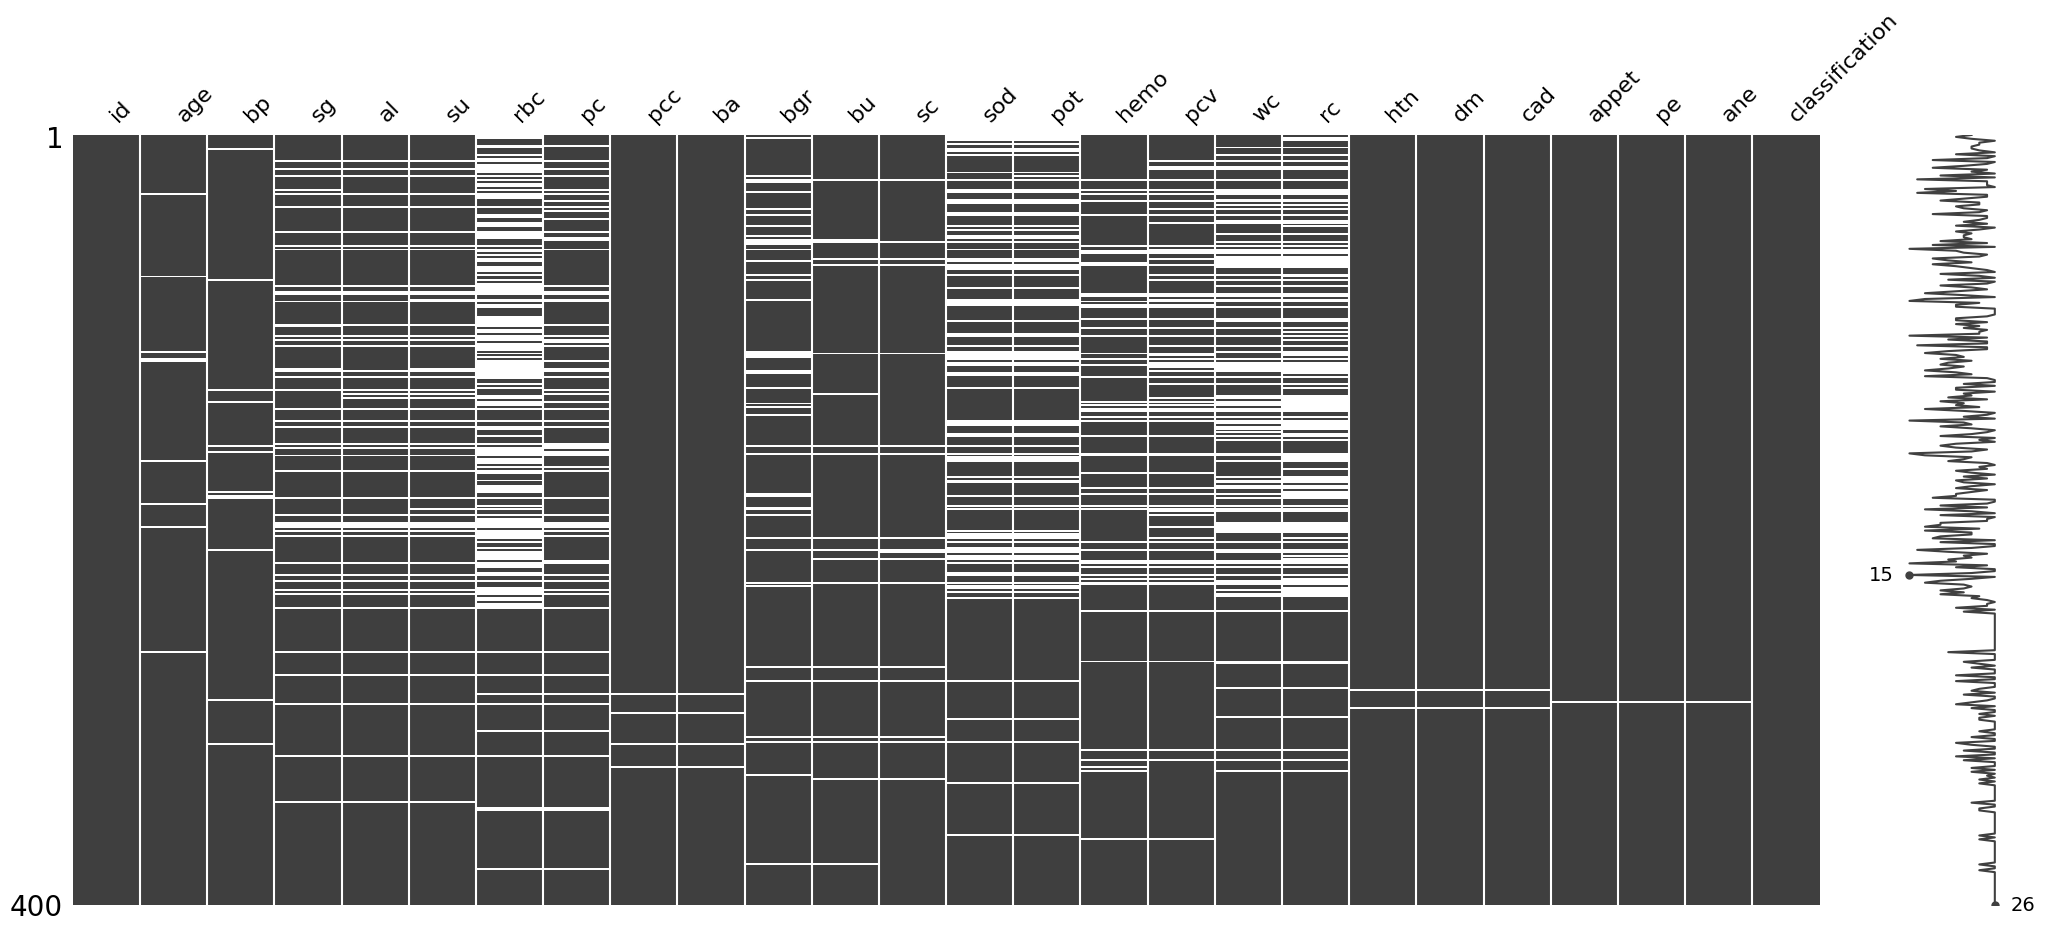

In [5]:
import missingno as msno
msno.matrix(df)

In [6]:
df['classification'] = df['classification'].str.strip()
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [7]:
df['wc'] = df['wc'].str.strip()
df['wc'].value_counts()

wc
9800    11
6700    10
9200     9
9600     9
7200     9
        ..
9900     1
5900     1
5200     1
9700     1
5100     1
Name: count, Length: 90, dtype: int64

In [8]:
df['pcv'] = df['pcv'].str.strip()
df['pcv'].value_counts()

pcv
52    21
41    21
44    19
48    19
40    16
43    15
45    13
42    13
28    12
36    12
32    12
33    12
50    12
34    11
37    11
35     9
29     9
46     9
30     9
31     8
24     7
39     7
26     6
38     5
54     4
53     4
49     4
47     4
51     4
22     3
25     3
27     3
19     2
23     2
16     1
17     1
18     1
?      1
14     1
21     1
15     1
9      1
20     1
Name: count, dtype: int64

In [9]:
df['rc'] = df['rc'].str.strip()
df['rc'].value_counts()

rc
5.2    18
4.5    16
4.9    14
4.7    11
3.9    10
4.8    10
3.4     9
4.6     9
3.7     8
5.0     8
6.1     8
5.9     8
5.5     8
5.8     7
3.8     7
5.4     7
5.3     7
5.6     6
4.3     6
4.2     6
6.5     5
6.2     5
5.7     5
3.2     5
4.1     5
4.4     5
5.1     5
6.4     5
6.3     4
6.0     4
3.6     4
4.0     3
4       3
3.5     3
3.3     3
5       2
2.6     2
2.8     2
2.9     2
3.1     2
2.5     2
2.1     2
3.0     2
2.7     2
2.3     1
8.0     1
2.4     1
?       1
3       1
Name: count, dtype: int64

In [10]:
df['cad'] = df['cad'].str.strip()
df['cad'].value_counts()

cad
no     364
yes     34
Name: count, dtype: int64

In [11]:
df['dm'] = df['dm'].str.strip()
df['dm'].value_counts()

dm
no     261
yes    137
Name: count, dtype: int64

In [12]:
num_cols = df.select_dtypes(include=["number"]).columns  
df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.median()))
print(df.isnull().sum())

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [13]:
cat_cols = df.select_dtypes(include=["object"]).columns  
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))
print(df.isnull().sum())

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [14]:
df.replace('?', np.nan, inplace=True)

In [15]:
for col in df.columns:
    df[col]
    print(f"Unique values in {col}: {df[col].nunique()}\n")

Unique values in id: 400

Unique values in age: 76

Unique values in bp: 10

Unique values in sg: 5

Unique values in al: 6

Unique values in su: 6

Unique values in rbc: 2

Unique values in pc: 2

Unique values in pcc: 2

Unique values in ba: 2

Unique values in bgr: 146

Unique values in bu: 118

Unique values in sc: 84

Unique values in sod: 34

Unique values in pot: 40

Unique values in hemo: 116

Unique values in pcv: 42

Unique values in wc: 89

Unique values in rc: 48

Unique values in htn: 2

Unique values in dm: 2

Unique values in cad: 2

Unique values in appet: 2

Unique values in pe: 2

Unique values in ane: 2

Unique values in classification: 2



In [16]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [17]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['classification', 'ane','pe','appet','cad','dm','htn','ba','pcc','pc','rbc'] 
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [18]:
X = df.drop('classification', axis=1)  
y = df['classification']              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

age_mapping = {'0-20': 10, '21-40': 30, '41-60': 50, '61-80': 70, '81-100': 90}
X_train['age_group'] = X_train['age_group'].map(age_mapping)
X_test['age_group'] = X_test['age_group'].map(age_mapping)



In [21]:
rf_reg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



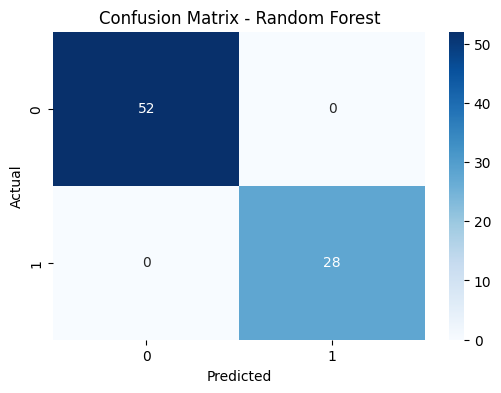

Accuracy: 1.00
Precision (Weighted Avg): 1.00
Recall (Weighted Avg): 1.00
F1-Score (Weighted Avg): 1.00


In [22]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred_rf = rf_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

precision = precision_score(y_test, y_pred_rf, average='weighted')  
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')


print("Classification Report:\n", classification_report(y_test, y_pred_rf))


cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted Avg): {precision:.2f}")
print(f"Recall (Weighted Avg): {recall:.2f}")
print(f"F1-Score (Weighted Avg): {f1:.2f}")
